In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # data manipulation
import os
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn import preprocessing # scale and center data
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.neural_network import MLPRegressor
import datetime
from pandas.tseries.offsets import *
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

## macroeconomic predictors

In [2]:
macro_data=pd.read_csv('C:\\Judy\\MFE Courses\\431_Quantitative_Asset_Management\\Final_Project\\Macro_Result.csv', index_col=0)
macro_data.rename(columns={'ep': 'earning_price'}, inplace=True)

In [3]:
# Load top 50 tech stock code
stk_cahr_data= pd.read_csv('C:\\Judy\\MFE Courses\\431_Quantitative_Asset_Management\\Final_Project\\50_neural_net_full.csv', index_col=0).reset_index(drop = True)
#stk_cahr_data.drop(columns=['TICKER','month','year'], inplace=True)
cit_cols = stk_cahr_data.iloc[:,3:97].columns

In [4]:
stk_cahr_data

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,month,year,TICKER
0,12490,1971/1/29,0.024390,3.403772e+06,0.803744,0.646005,0.590998,12.965288,0.020154,-0.299786,...,5.840000e-10,0.019481,0.008485,0.313654,0.110307,2.850000e-07,73.0,1,1971,IBM
1,46711,1971/1/29,0.400000,5.715000e+03,0.836741,0.700136,0.100862,7.024093,0.056848,-0.071420,...,2.250000e-06,0.025641,0.026531,0.854184,2.057111,4.540000e-08,42.0,1,1971,TSM
2,12490,1971/2/26,0.037788,3.578008e+06,0.794590,0.631373,0.533709,13.163648,0.020440,-0.201744,...,8.320000e-10,0.025197,0.010993,0.266698,0.081812,3.590000e-07,73.0,2,1971,IBM
3,46711,1971/2/26,0.285714,8.001000e+03,0.839637,0.704991,0.833386,7.826044,0.056339,0.082094,...,6.040000e-06,0.096154,0.037649,1.001973,1.896845,7.020000e-08,42.0,2,1971,TSM
4,12490,1971/3/31,0.062407,3.664222e+06,0.753383,0.567586,0.484282,13.195981,0.020724,-0.157373,...,8.800000e-10,0.022088,0.010564,0.221342,0.054026,4.700000e-07,73.0,3,1971,IBM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016/12/30,0.021356,1.071768e+08,0.899436,0.808984,0.054448,18.580861,0.031339,0.016401,...,6.560000e-12,0.029128,0.015422,0.458631,3.774304,1.280000e-08,73.0,12,2016,GOOGL
7278,91893,2016/12/30,-0.135343,3.000031e+04,0.831672,0.691679,-0.164510,9.723564,0.096353,0.016401,...,5.990000e-07,0.060870,0.041781,0.913348,2.241420,3.910000e-08,73.0,12,2016,FNJN
7279,92257,2016/12/30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,7.230000e-11,0.032050,0.011528,0.484570,4.852816,7.060000e-09,73.0,12,2016,VMW
7280,93132,2016/12/30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,1.880000e-10,0.018459,0.013527,0.574037,8.767311,7.270000e-09,35.0,12,2016,FTNT


In [361]:
macro_data['date'] = pd.to_datetime(macro_data['yyyymm'].astype(str), format='%Y%m', errors='ignore') + MonthEnd(1)
macro_data['Year'] = macro_data['date'].dt.year
macro_data['Month'] = macro_data['date'].dt.month

In [362]:
macro_data

,yyyymm,dp,earning_price,tms,dfy,b/m,ntis,tbl,svar,date,Year,Month
0,187101,-2.837728,-2.406945,NaN,NaN,NaN,NaN,NaN,NaN,1871-01-31,1871,1
1,187102,-2.851151,-2.420368,NaN,NaN,NaN,NaN,NaN,NaN,1871-02-28,1871,2
2,187103,-2.875302,-2.444519,NaN,NaN,NaN,NaN,NaN,NaN,1871-03-31,1871,3
3,187104,-2.903111,-2.472328,NaN,NaN,NaN,NaN,NaN,NaN,1871-04-30,1871,4
4,187105,-2.928112,-2.497329,NaN,NaN,NaN,NaN,NaN,NaN,1871-05-31,1871,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1795,202008,-4.080892,-3.569975,0.0055,0.0102,0.235975,-0.008504,0.0010,0.000743,2020-08-31,2020,8
1796,202009,-4.045576,-3.533379,0.0057,0.0105,0.241482,-0.005698,0.0011,0.004907,2020-09-30,2020,9
1797,202010,-4.020767,-3.519301,0.0069,0.0109,0.253146,-0.001895,0.0010,0.003661,2020-10-31,2020,10
1798,202011,-4.126172,-3.635623,0.0078,0.0100,0.226352,-0.005262,0.0009,0.002492,2020-11-30,2020,11


In [363]:
stk_cahr_data['DATE'] = pd.to_datetime(stk_cahr_data['DATE'], format='%Y/%m/%d', errors='ignore')
stk_cahr_data['Year'] = stk_cahr_data['DATE'].dt.year
stk_cahr_data['Month'] = stk_cahr_data['DATE'].dt.month

In [364]:
all_data = stk_cahr_data.merge(macro_data, on=['Year', 'Month'], how='left').copy()
all_data['Const'] = 1
all_data.drop(columns=['Year','Month','yyyymm','date'], inplace=True)

In [365]:
all_data

,permno,DATE,monthly_ret,mvel1,beta,betasq,chmom,dolvol,idiovol,indmom,...,TICKER,dp,earning_price,tms,dfy,b/m,ntis,tbl,svar,Const
0,12490,1971-01-29,0.024390,3.403772e+06,0.803744,0.646005,0.590998,12.965288,0.020154,-0.299786,...,IBM,-3.422064,-2.922161,0.0168,0.0138,0.624410,0.030593,0.0444,0.000541,1
1,46711,1971-01-29,0.400000,5.715000e+03,0.836741,0.700136,0.100862,7.024093,0.056848,-0.071420,...,TSM,-3.422064,-2.922161,0.0168,0.0138,0.624410,0.030593,0.0444,0.000541,1
2,12490,1971-02-26,0.037788,3.578008e+06,0.794590,0.631373,0.533709,13.163648,0.020440,-0.201744,...,IBM,-3.434297,-2.925397,0.0259,0.0131,0.617070,0.025801,0.0370,0.000451,1
3,46711,1971-02-26,0.285714,8.001000e+03,0.839637,0.704991,0.833386,7.826044,0.056339,0.082094,...,TSM,-3.434297,-2.925397,0.0259,0.0131,0.617070,0.025801,0.0370,0.000451,1
4,12490,1971-03-31,0.062407,3.664222e+06,0.753383,0.567586,0.484282,13.195981,0.020724,-0.157373,...,IBM,-3.473643,-2.955768,0.0255,0.0125,0.633811,0.026399,0.0338,0.000493,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.021356,1.071768e+08,0.899436,0.808984,0.054448,18.580861,0.031339,0.016401,...,GOOGL,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1
7278,91893,2016-12-30,-0.135343,3.000031e+04,0.831672,0.691679,-0.164510,9.723564,0.096353,0.016401,...,FNJN,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1
7279,92257,2016-12-30,-0.029702,9.052465e+06,0.685033,0.469270,0.353670,17.364384,0.036946,0.016401,...,VMW,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1
7280,93132,2016-12-30,0.000664,5.208474e+06,1.299777,1.689419,-0.069890,16.991111,0.037352,0.053773,...,FTNT,-3.891597,-3.164580,0.0221,0.0077,0.293479,-0.025027,0.0051,0.000524,1


In [366]:
xt_cols = ['dp', 'earning_price', 'tms', 'dfy', 'b/m', 'ntis', 'tbl', 'svar', 'Const']
Pc = len(cit_cols)
Px = len(xt_cols)

In [367]:
print(f'total covariates should be: Pxt * Pcit = {Pc} * {Px} = {Pc * Px}')

total covariates should be: Pxt * Pcit = 94 * 9 = 846


In [368]:
all_data['sic2']=all_data['sic2'].astype(object)
#Removed one level as we have Const
industry = pd.get_dummies(all_data.sic2).iloc[:,:-1]
# all_data = all_data.join(pd.get_dummies(all_data.sic2).iloc[:,:-1])
#all_data.to_csv(data_folder + 'macro_stock_dummies.csv')
all_data.drop(columns=['sic2'], inplace=True)

In [369]:
industry.columns = [str(col) + '_i' for col in industry.columns]

In [370]:
def kro(row):
    Cit = row[cit_cols]
    Xt = row[xt_cols]
    zit = np.kron(Xt, Cit)
    return zit

Zit = pd.DataFrame(all_data.apply(kro, axis=1).to_list())

In [371]:
Zit.insert (0, "permno", all_data['permno'])
Zit.insert (1, "DATE", all_data['DATE'])
Zit.insert (2, "monthly_ret", all_data['monthly_ret'])
Zit.sort_values(by=['DATE'])
Zit

,permno,DATE,monthly_ret,0,1,2,3,4,5,6,...,836,837,838,839,840,841,842,843,844,845
0,12490,1971-01-29,0.024390,-1.164793e+07,-2.750465,-2.210671,-2.022432,-44.368052,-0.068970,1.025887,...,NaN,NaN,NaN,0.011906,5.840000e-10,0.019481,0.008485,0.313654,0.110307,2.850000e-07
1,46711,1971-01-29,0.400000,-1.955710e+04,-2.863383,-2.395910,-0.345155,-24.036898,-0.194539,0.244403,...,NaN,NaN,NaN,0.033081,2.250000e-06,0.025641,0.026531,0.854184,2.057111,4.540000e-08
2,12490,1971-02-26,0.037788,-1.228795e+07,-2.728858,-2.168323,-1.832916,-45.207880,-0.070198,0.692848,...,NaN,NaN,NaN,0.012634,8.320000e-10,0.025197,0.010993,0.266698,0.081812,3.590000e-07
3,46711,1971-02-26,0.285714,-2.747781e+04,-2.883564,-2.421148,-2.862096,-26.876962,-0.193485,-0.281934,...,NaN,NaN,NaN,0.035391,6.040000e-06,0.096154,0.037649,1.001973,1.896845,7.020000e-08
4,12490,1971-03-31,0.062407,-1.272820e+07,-2.616984,-1.971592,-1.682221,-45.838124,-0.071988,0.546658,...,NaN,NaN,NaN,0.013848,8.800000e-10,0.022088,0.010564,0.221342,0.054026,4.700000e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.021356,-4.170891e+08,-3.500241,-3.148241,-0.211888,-72.309228,-0.121959,-0.063825,...,0.066523,0.066694,8.0,0.021003,6.560000e-12,0.029128,0.015422,0.458631,3.774304,1.280000e-08
7278,91893,2016-12-30,-0.135343,-1.167491e+05,-3.236533,-2.691735,0.640208,-37.840194,-0.374966,-0.063825,...,NaN,NaN,3.0,0.102578,5.990000e-07,0.060870,0.041781,0.913348,2.241420,3.910000e-08
7279,92257,2016-12-30,-0.029702,-3.522855e+07,-2.665872,-1.826209,-1.376340,-67.575189,-0.143780,-0.063825,...,0.115166,0.103160,5.0,0.017066,7.230000e-11,0.032050,0.011528,0.484570,4.852816,7.060000e-09
7280,93132,2016-12-30,0.000664,-2.026928e+07,-5.058207,-6.574539,0.271985,-66.122560,-0.145359,-0.209261,...,0.092266,0.086121,6.0,0.027387,1.880000e-10,0.018459,0.013527,0.574037,8.767311,7.270000e-09


In [416]:
kronercker_outcome = Zit.copy()
kronercker_outcome = kronercker_outcome.fillna(0)
kronercker_outcome['Year'] = kronercker_outcome['DATE'].dt.year
kronercker_outcome['Month'] = kronercker_outcome['DATE'].dt.month

In [417]:
kronercker_outcome['shift'] = kronercker_outcome.groupby(['permno'])['monthly_ret'].shift(-1)

In [418]:
kronercker_outcome.insert (2, "shift_return", kronercker_outcome['shift'])

In [419]:
kronercker_outcome = kronercker_outcome.fillna(0)

In [420]:

del kronercker_outcome['Month']
del kronercker_outcome['monthly_ret']
del kronercker_outcome['shift']

In [376]:
industry

,13.0_i,28.0_i,34.0_i,35.0_i,36.0_i,37.0_i,42.0_i,59.0_i,60.0_i,73.0_i,78.0_i,79.0_i
0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7277,0,0,0,0,0,0,0,0,0,1,0,0
7278,0,0,0,0,0,0,0,0,0,1,0,0
7279,0,0,0,0,0,0,0,0,0,1,0,0
7280,0,0,0,1,0,0,0,0,0,0,0,0


In [421]:
kronercker_outcome = kronercker_outcome.join(industry)

In [422]:
kronercker_outcome

,permno,DATE,shift_return,0,1,2,3,4,5,6,...,34.0_i,35.0_i,36.0_i,37.0_i,42.0_i,59.0_i,60.0_i,73.0_i,78.0_i,79.0_i
0,12490,1971-01-29,0.037788,-1.164793e+07,-2.750465,-2.210671,-2.022432,-44.368052,-0.068970,1.025887,...,0,0,0,0,0,0,0,1,0,0
1,46711,1971-01-29,0.285714,-1.955710e+04,-2.863383,-2.395910,-0.345155,-24.036898,-0.194539,0.244403,...,0,0,0,0,1,0,0,0,0,0
2,12490,1971-02-26,0.062407,-1.228795e+07,-2.728858,-2.168323,-1.832916,-45.207880,-0.070198,0.692848,...,0,0,0,0,0,0,0,1,0,0
3,46711,1971-02-26,0.055556,-2.747781e+04,-2.883564,-2.421148,-2.862096,-26.876962,-0.193485,-0.281934,...,0,0,0,0,1,0,0,0,0,0
4,12490,1971-03-31,0.000699,-1.272820e+07,-2.616984,-1.971592,-1.682221,-45.838124,-0.071988,0.546658,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7277,90319,2016-12-30,0.000000,-4.170891e+08,-3.500241,-3.148241,-0.211888,-72.309228,-0.121959,-0.063825,...,0,0,0,0,0,0,0,1,0,0
7278,91893,2016-12-30,0.000000,-1.167491e+05,-3.236533,-2.691735,0.640208,-37.840194,-0.374966,-0.063825,...,0,0,0,0,0,0,0,1,0,0
7279,92257,2016-12-30,0.000000,-3.522855e+07,-2.665872,-1.826209,-1.376340,-67.575189,-0.143780,-0.063825,...,0,0,0,0,0,0,0,1,0,0
7280,93132,2016-12-30,0.000000,-2.026928e+07,-5.058207,-6.574539,0.271985,-66.122560,-0.145359,-0.209261,...,0,1,0,0,0,0,0,0,0,0


In [423]:
train_df = kronercker_outcome[kronercker_outcome['Year']<2011]
test_df = kronercker_outcome[kronercker_outcome['Year'] >= 2011]

In [424]:
del train_df['Year']
del test_df['Year']

In [434]:
del kronercker_outcome['Year']

In [433]:
X_train = train_df.iloc[:,3:861]
y_train = train_df['shift_return']
X_test = test_df.iloc[:,3:861]
y_test = test_df['shift_return']

In [256]:
5793/(5562+1720)

0.7955232079099148

In [435]:
X = kronercker_outcome.iloc[:,3:849]
y = kronercker_outcome['shift_return']

## Different Functions

### OLS

In [120]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict

from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [436]:
lm = LinearRegression()
y_pred = cross_val_predict(lm, X_train, y_train, cv=5)
final_model = lm.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [437]:
MSE_OLS = mean_squared_error(new_predictions,y_test)
MSE_OLS

0.07896048588207363

In [438]:
R2_OLS = 1-  sum((new_predictions - y_test)**2) / sum((y_test)**2)
R2_OLS

-6.242339394881813

In [129]:
#R2_OLS = r2_score(new_predictions,y_test)
#R2_OLS

-4.6357298805352585

### OLS 3

### PLS

In [39]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold

Text(0.5, 1.0, 'hp')

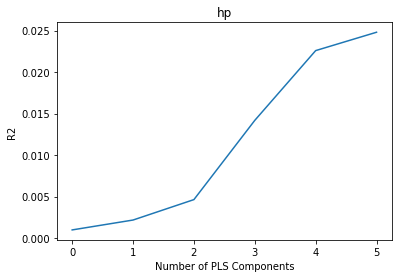

In [277]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

r2 = []
n = len(X)

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(PLSRegression(n_components=1),
           np.ones((n,1)), y, cv=cv, scoring='r2').mean()    
r2.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='r2').mean()
    r2.append(score)

#plot test MSE vs. number of components
plt.plot(r2)
plt.xlabel('Number of PLS Components')
plt.ylabel('R2')
plt.title('hp')

In [439]:
# Choose components = 2
pls = PLSRegression(n_components=1)
final_model = pls.fit(X_train,y_train)
new_predictions = final_model.predict(X_test)

In [440]:
MSE_PLS = mean_squared_error(new_predictions,y_test)
MSE_PLS

0.010728991729326263

In [441]:
t = new_predictions.tolist()
new_predictions = sum(t,[])

In [442]:
R2_PLS = 1-  sum((new_predictions - y_test)**2) / sum((y_test)**2)
R2_PLS

0.01592551514045848

## PCR

Text(0.5, 1.0, 'hp')

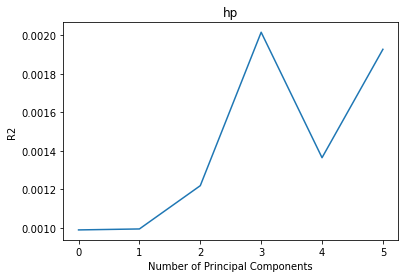

In [319]:
from sklearn.decomposition import PCA
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

#define cross validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept
score = -1*model_selection.cross_val_score(regr,
           np.ones((len(X_reduced),1)), y, cv=cv,
           scoring='r2').mean()    
mse.append(score)

# Calculate MSE using cross-validation, adding one component at a time
for i in np.arange(1, 6):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='r2').mean()
    mse.append(score)
    
# Plot cross-validation results    
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('R2')
plt.title('hp')

In [443]:
## Chose parameter = 1
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

#train PCR model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

#calculate RMSE
pred = regr.predict(X_reduced_test)

In [444]:
MSE_PCR = mean_squared_error(pred,y_test)
MSE_PCR

0.010716650572865607

In [446]:
R2_PCR = 1-  sum((pred - y_test)**2) / sum((y_test)**2)
R2_PCR

0.017057459081976423

## Elastic Net

In [300]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

In [447]:
lambdas = 2**np.linspace(-1,5,25)*0.02
elastic_net = ElasticNet(l1_ratio = 0.5)
coefs = pd.DataFrame(index = lambdas, columns = X_train.columns)
for j, l in enumerate(lambdas):
        elastic_net.alpha = l   # set the severity of the constraint
        elastic_net.fit(X_train, y_train)
        coefs.iloc[j] = elastic_net.coef_
coefs

,0,1,2,3,4,5,6,7,8,9,...,34.0_i,35.0_i,36.0_i,37.0_i,42.0_i,59.0_i,60.0_i,73.0_i,78.0_i,79.0_i
0.010000,1.92634e-09,-0,-0,-0,-0,-0,0,0,-0,0.000437054,...,-0,0,0,0,-0,0,-0,0,0,0
0.011892,1.94046e-09,-0,-0,-0,-0,-0,0,0,-0,0.000165298,...,-0,0,0,0,-0,0,-0,0,0,0
0.014142,1.93615e-09,-0,-1.08251e-05,-0,-2.21085e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,0,-0,0,0,0
0.016818,1.93251e-09,-0,-0.000106722,-0,-6.92078e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,0,-0,0,0,0
0.020000,1.93347e-09,-0,-9.81275e-05,-0,-8.82633e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,0,-0,0,0,0
0.023784,1.93718e-09,-0,-8.12088e-05,-0,-0.000104291,-0,0,0,-0,0,...,-0,0,0,0,-0,0,-0,0,0,0
0.028284,1.93922e-09,-0,-5.15034e-05,-0,-7.78038e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,-0,-0,0,0,0
0.033636,1.93516e-09,-0,-1.14707e-05,-0,-3.83099e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,-0,-0,0,0,0
0.040000,1.92803e-09,-0,-0,-0,-3.63717e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,-0,-0,0,0,0
0.047568,1.91446e-09,-0,-0,-0,-3.9885e-05,-0,0,0,-0,0,...,-0,0,0,0,-0,-0,-0,0,0,0


In [448]:
alpha = 10**np.linspace(-1,10,100)*0.02
elastic_net = ElasticNetCV(l1_ratio=0.5,alphas=alpha,cv=5)
elastic_net.fit(X_train, y_train)
elastic_net.alpha_
elastic_net.coef_

array([ 6.76802526e-11, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  

In [449]:
pred = elastic_net.predict(X_test)
MSE_EN = mean_squared_error(pred,y_test)
MSE_EN

0.010753029696701047

In [450]:
R2_EN= 1-  sum((pred - y_test)**2) / sum((y_test)**2)
R2_EN

0.013720727313402348

## Random Forest
### Not cross_validation yet

In [187]:
from sklearn.ensemble import RandomForestRegressor

In [451]:
rf = RandomForestRegressor(n_estimators = 250, max_depth = 10, random_state = 42, max_features = 9)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_features=9, n_estimators=250,
                      random_state=42)

In [452]:
pred = rf.predict(X_test)
MSE_RF = mean_squared_error(pred,y_test)
MSE_RF

0.010764350356698718

In [453]:
R2_RF = 1-  sum((pred - y_test)**2) / sum((y_test)**2)
R2_RF

0.012682384388311485

## XGBoost

In [323]:
#import xgboost as xgb
#xgb_regressor = xgb.XGBRegressor(booster = "gbtree", objective = "reg:squarederror", n_estimators = 999,reg_lambda = 10, gamma = 0, max_depth = 6,learning_rate = 0.3)
#xgb_parm = xgb_regressor.get_xgb_params()
#xgb_train = xgb.DMatrix(X_train,y_train)
#xgb_cvresult = xgb.cv(xgb_parm,xgb_train,num_boost_round = 999, metrics = 'rmse',nfold = 10,stratified = False, seed = i+1234,early_stopping_rounds = 20)
#xgb_regressor.set_params(n_estimators = xgb_cvresult.shape[0])
#xgb_regressor.fit(X_test,y_test)
#xgb_prediction = xgb_regressor.predict(X_test,ntree_limit = xgb_cvresult.shape[0])
#MSE_xgb = mean_squared_error(xgb_prediction,y_test)
#MSE_xgb
#R2_XGB = 1-  sum((xgb_prediction - y_test)**2) / sum((y_test)**2)
#R2_XGB

## Outcome(MSE)

In [199]:
import matplotlib.pyplot as plt
import statsmodels.api   as sm
import seaborn           as sns

In [454]:
outcome = pd.DataFrame(['OLS','PLS','PCR','Elastic Net','Random Forest'],columns = ["method"])
outcome['mse'] = [MSE_OLS,MSE_PLS,MSE_PCR,MSE_EN,MSE_RF]
#plt.figure(figsize = [10,10])
#sns.barplot(x = 'method', y = 'mse', data = outcome)

## Outcome(R2)

In [455]:
outcome['R2'] = [R2_OLS,R2_PLS,R2_PCR,R2_EN,R2_RF]
#plt.figure(figsize = [10,10])
#sns.barplot(x = 'method', y = 'R2', data = outcome)

In [456]:
# Cut2011
outcome

,method,mse,R2
0,OLS,0.078960,-6.242339
1,PLS,0.010729,0.015926
2,PCR,0.010717,0.017057
3,Elastic Net,0.010753,0.013721
4,Random Forest,0.010764,0.012682


## Neural Network

#### NN1

In [457]:
NN1 = MLPRegressor(solver='lbfgs', alpha=1,activation='tanh',
                    hidden_layer_sizes=(32,), max_iter = 10000, random_state=1)
NN1.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=(32,),
             max_iter=10000, random_state=1, solver='lbfgs')

In [458]:
R2_NN1 = 1-  np.nansum((NN1.predict(X_test) - y_test)**2) / np.nansum((y_test)**2)
R2_NN1

0.016266200994377922

#### NN2

In [459]:
NN2 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16), max_iter = 100000, random_state = 1)
NN2.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=(32, 16),
             max_iter=100000, random_state=1, solver='lbfgs')

In [460]:
R2_NN2 = 1-  np.nansum((NN2.predict(X_test) - y_test)**2) / np.nansum((y_test)**2)
R2_NN2

0.021566247787362713

#### NN3

In [461]:
NN3 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8,), max_iter = 100000, random_state = 1)

NN3.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=(32, 16, 8),
             max_iter=100000, random_state=1, solver='lbfgs')

In [462]:
R2_NN3 = 1-  np.nansum((NN3.predict(X_test) - y_test)**2) / np.nansum((y_test)**2)
R2_NN3 

0.013413456614577157

#### NN4

In [463]:
NN4 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8, 4), max_iter = 100000, random_state = 1)

NN4.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=(32, 16, 8, 4),
             max_iter=100000, random_state=1, solver='lbfgs')

In [464]:
R2_NN4 = 1-  np.nansum((NN4.predict(X_test) - y_test)**2) / np.nansum((y_test)**2)
R2_NN4

0.016140641970330605

#### NN5

In [465]:
NN5 = MLPRegressor(solver = 'lbfgs', alpha = 1, activation='tanh',
                      hidden_layer_sizes = (32,16, 8, 4, 2,), max_iter = 100000, random_state = 1)

NN5.fit(X_train,y_train)

MLPRegressor(activation='tanh', alpha=1, hidden_layer_sizes=(32, 16, 8, 4, 2),
             max_iter=100000, random_state=1, solver='lbfgs')

In [466]:
R2_NN5 = 1-  np.nansum((NN5.predict(X_test) - y_test)**2) / np.nansum((y_test)**2)
R2_NN5

0.01878548123619883

In [467]:
outcome2 = pd.DataFrame(['OLS','PLS','PCR','Elastic Net','Random Forest','NN1','NN2','NN3','NN4','NN5'],columns = ["method"])
outcome2['R2'] = [R2_OLS,R2_PLS,R2_PCR,R2_EN,R2_RF,R2_NN1,R2_NN2,R2_NN3,R2_NN4,R2_NN5]
outcome2

,method,R2
0,OLS,-6.242339
1,PLS,0.015926
2,PCR,0.017057
3,Elastic Net,0.013721
4,Random Forest,0.012682
5,NN1,0.016266
6,NN2,0.021566
7,NN3,0.013413
8,NN4,0.016141
9,NN5,0.018785


<AxesSubplot:xlabel='method', ylabel='R2'>

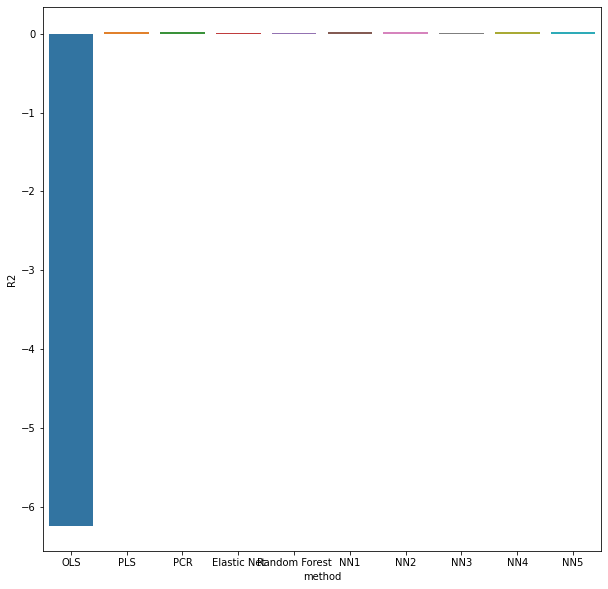

In [468]:
plt.figure(figsize = [10,10])
sns.barplot(x = 'method', y = 'R2', data = outcome2)

<AxesSubplot:xlabel='method', ylabel='R2'>

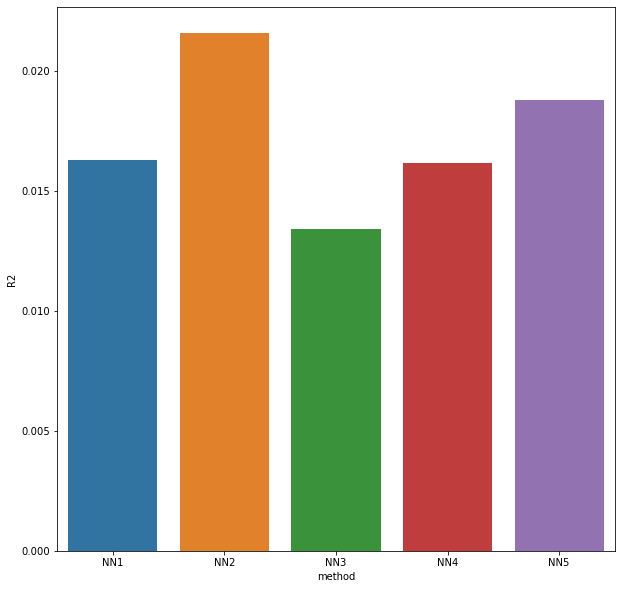

In [469]:
NN = outcome2.iloc[5:10,:]
plt.figure(figsize = [10,10])
sns.barplot(x = 'method', y = 'R2', data = NN )

In [470]:
# Draw plot withour OLS
temp = outcome2.iloc[1:10,:]

<AxesSubplot:xlabel='method', ylabel='R2'>

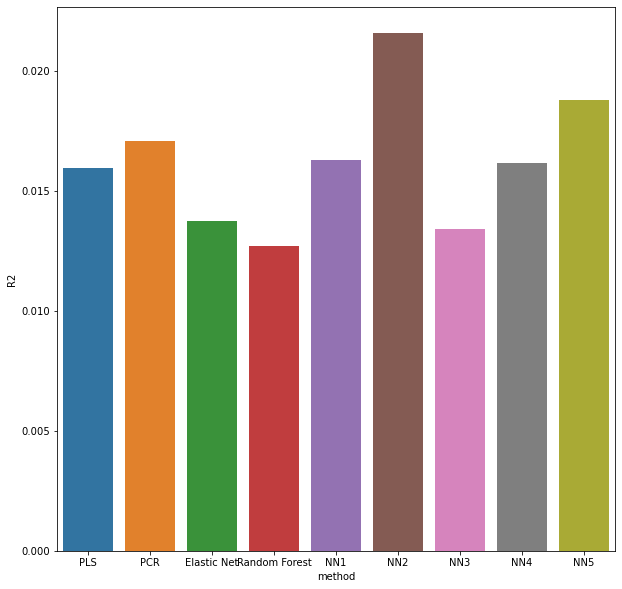

In [472]:
plt.figure(figsize = [10,10])
sns.barplot(x = 'method', y = 'R2', data = temp)